In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
#import matplotlib.cm as cm
#import matplotlib.colors as colors

print('Libraries imported.')

Libraries imported.


In [2]:
pip install lxml -q

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install bs4 -q

Note: you may need to restart the kernel to use updated packages.


In [4]:
from bs4 import BeautifulSoup

In [5]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import re
pd.set_option("display.max_rows", 999)
pd.options.display.max_colwidth = 100

In [6]:
import lxml

Scarica portafogli prima pagina poiché indirizzo strutturato diversamente rispetto alle successive

In [7]:
urlinit='https://bitinfocharts.com/top-100-richest-bitcoin-addresses.html'
columns = ['0','Address','Balance','% of coins', 'First In','Last In','Number Of Ins','First Out','Last Out', 'Number of Outs']
result = pd.DataFrame(columns=columns)
page = requests.get(urlinit).text
doc = BeautifulSoup(page, 'html.parser')
print(urlinit)
address = doc.find('table')
table = doc.find_all('table')
df1 = pd.read_html(str(table))[2]
df1.columns = ['0','Address','Balance','% of coins', 'First In','Last In','Number Of Ins','First Out','Last Out', 'Number of Outs']
table2 = doc.find_all('table')
df2 = pd.read_html(str(table))[3]
df2.columns = ['0','Address','Balance','% of coins', 'First In','Last In','Number Of Ins','First Out','Last Out', 'Number of Outs']
df3 = pd.concat([df1, df2], axis=0,ignore_index=True)
result=df3

https://bitinfocharts.com/top-100-richest-bitcoin-addresses.html


In [8]:
print(address)

<table class="table table-condensed bb" style="max-width:1000px;text-align:center; width: inherit;"><caption>Bitcoin distribution</caption><thead> <tr><th>Balance, BTC</th><th>Addresses</th><th class="hidden-phone">% Addresses (Total)</th><th>Coins</th><th>USD</th><th class="hidden-phone">% Coins (Total)</th></tr> </thead> <tbody><tr><td>(0 - 0.001)</td><td data-val="19744546">19744546</td><td class="hidden-phone" data-val="100">51.09% (100%)</td><td data-val="4118.64723573">4,119 BTC</td><td data-val="4118.64723573">$190,280,907</td><td class="hidden-phone" data-val="100">0.02% (100%)</td></tr><tr><td>[0.001 - 0.01)</td><td data-val="9793875">9793875</td><td class="hidden-phone" data-val="49">25.34% (48.91%)</td><td data-val="36927.2854739">36,927 BTC</td><td data-val="36927.2854739">$1,706,035,252</td><td class="hidden-phone" data-val="100">0.2% (99.98%)</td></tr><tr><td>[0.01 - 0.1)</td><td data-val="5878755">5878755</td><td class="hidden-phone" data-val="24">15.21% (23.57%)</td><td

Scarica portafogli da pagine successive, primi 2000 portafogli per dimensione

In [9]:
url1='https://bitinfocharts.com/top-100-richest-bitcoin-addresses-'
url2='.html'
columns = ['0','Address','Balance','% of coins', 'First In','Last In','Number Of Ins','First Out','Last Out', 'Number of Outs']
#result = pd.DataFrame(columns=columns)

for x in range(2,21):
        url3=url1+str(x)+url2
        page = requests.get(url3).text
        doc = BeautifulSoup(page, 'html.parser')
        print(url3)
        address = doc.find('table')
        table = doc.find_all('table')
        df1 = pd.read_html(str(table))[0]
        df1.columns = ['0','Address','Balance','% of coins', 'First In','Last In','Number Of Ins','First Out','Last Out', 'Number of Outs']
        table2 = doc.find_all('table')
        df2 = pd.read_html(str(table))[1]
        df2.columns = ['0','Address','Balance','% of coins', 'First In','Last In','Number Of Ins','First Out','Last Out', 'Number of Outs']
        df3 = pd.concat([df1, df2], axis=0,ignore_index=True)
        result = pd.concat([result, df3], axis=0,ignore_index=True)
else:
  print("Finally finished!") 

https://bitinfocharts.com/top-100-richest-bitcoin-addresses-2.html
https://bitinfocharts.com/top-100-richest-bitcoin-addresses-3.html
https://bitinfocharts.com/top-100-richest-bitcoin-addresses-4.html
https://bitinfocharts.com/top-100-richest-bitcoin-addresses-5.html
https://bitinfocharts.com/top-100-richest-bitcoin-addresses-6.html
https://bitinfocharts.com/top-100-richest-bitcoin-addresses-7.html
https://bitinfocharts.com/top-100-richest-bitcoin-addresses-8.html
https://bitinfocharts.com/top-100-richest-bitcoin-addresses-9.html
https://bitinfocharts.com/top-100-richest-bitcoin-addresses-10.html
https://bitinfocharts.com/top-100-richest-bitcoin-addresses-11.html
https://bitinfocharts.com/top-100-richest-bitcoin-addresses-12.html
https://bitinfocharts.com/top-100-richest-bitcoin-addresses-13.html
https://bitinfocharts.com/top-100-richest-bitcoin-addresses-14.html
https://bitinfocharts.com/top-100-richest-bitcoin-addresses-15.html
https://bitinfocharts.com/top-100-richest-bitcoin-addres

In [10]:
result

,0,Address,Balance,% of coins,First In,Last In,Number Of Ins,First Out,Last Out,Number of Outs
0,1,34xp4vRoCGJym3xR7yCVPFHoCNxv4Twseowallet: Binance-coldwallet,"288,126 BTC ($13,311,388,913) / +0.00169 BTC",1.53%,2018-10-18 12:59:18 UTC,2021-09-02 12:55:00 UTC,621,2018-10-18 13:19:26 UTC,2021-07-26 14:25:53 UTC,424.0
1,2,bc1qgdjqv0av3q56jvd82tkdjpy7gdp9ut8tlqmgrpmv24sq90ecnvqqjw..vw97wallet: Bitfinex-coldwallet,"178,011 BTC ($8,224,081,801)",0.9464%,2019-08-16 10:00:29 UTC,2021-08-26 06:57:48 UTC,70,2020-02-02 17:43:14 UTC,2021-06-25 17:58:00 UTC,66.0
2,3,1P5ZEDWTKTFGxQjZphgWPQUpe554WKDfHQ,"108,924 BTC ($5,032,254,408) -1010 BTC / -1918 BTC",0.5791%,2019-02-06 02:18:39 UTC,2021-09-08 00:05:21 UTC,438,2019-02-10 21:58:57 UTC,2021-09-02 23:34:15 UTC,54.0
3,4,37XuVSEpWW4trkfmvWzegTHQt7BdktSKUswallet: 77604498,"94,505 BTC ($4,366,122,611)",0.5024%,2019-09-06 03:30:05 UTC,2021-08-31 03:32:37 UTC,117,2021-07-04 03:56:36 UTC,2021-07-04 04:10:14 UTC,2.0
4,5,38UmuUqPCrFmQo4khkomQwZ4VbY2nZMJ67 2-of-6wallet: OKEX-coldwallet,"93,566 BTC ($4,322,736,675) / +8502 BTC",0.4974%,2016-03-14 22:20:01 UTC,2021-08-26 07:19:46 UTC,262,2016-03-15 17:57:11 UTC,2021-06-11 19:41:54 UTC,131.0
...,...,...,...,...,...,...,...,...,...,...
1995,1996,1PCuHryZkaL4rqMuo6EGDs9YgpANVaSkvuwallet: 38600897,"1,000 BTC ($46,199,859)",0.0053163682796292%,2018-03-23 09:10:21 UTC,2021-05-14 03:12:32 UTC,16,2018-03-23 09:52:07 UTC,2018-03-23 09:52:07 UTC,1.0
1996,1997,1DNMGfqyd3Uab3QKBj7RNy8FafRNi9ymxGwallet: 38600897,"1,000 BTC ($46,199,859)",0.0053163682796292%,2018-03-23 09:10:21 UTC,2021-06-13 08:32:25 UTC,16,2018-03-23 09:52:07 UTC,2018-03-23 09:52:07 UTC,1.0
1997,1998,16m7L6UUTxDDtnYdcQDZaePtFLdz3maw3ywallet: 38600897,"1,000 BTC ($46,199,859)",0.0053163682796292%,2018-03-23 09:10:21 UTC,2021-05-14 03:12:32 UTC,16,2018-03-23 09:52:07 UTC,2018-03-23 09:52:07 UTC,1.0
1998,1999,3CwZ1oMTQDMtJWdUqfuRd2FoTvMrcCcWs8,"1,000 BTC ($46,199,859)",0.0053163682769179%,2020-04-25 03:01:48 UTC,2021-06-13 08:32:25 UTC,15,NaN,NaN,NaN


In [65]:
result['First In'] = result['First In'].astype("datetime64")
result['Last In'] = result['Last In'].astype("datetime64")
result['First Out'] = result['First Out'].astype("datetime64")
result['Last Out'] = result['Last Out'].astype("datetime64")

In [66]:
result['FI_year'] = result['First In'].dt.year
result['LI_year'] = result['Last In'].dt.year
result['FO_year'] = result['First Out'].dt.year
result['LO_year'] = result['Last Out'].dt.year

<AxesSubplot:xlabel='FI_year'>

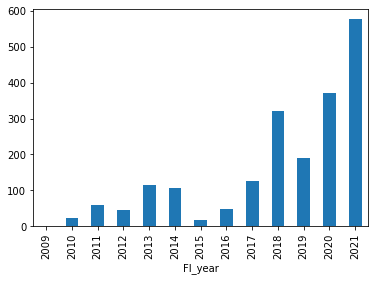

In [71]:
result.groupby(axis=0,by=['FI_year'])['FI_year'].count().plot(kind="bar")

<AxesSubplot:xlabel='LI_year'>

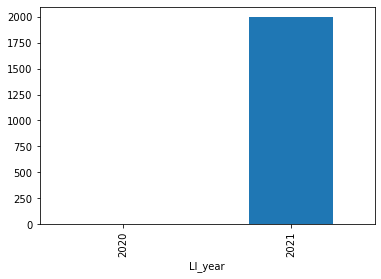

In [68]:
result.groupby(axis=0,by=['LI_year'])['LI_year'].count().plot(kind="bar")

<AxesSubplot:xlabel='FO_year'>

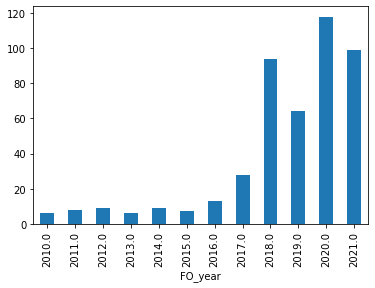

In [69]:
result.groupby(axis=0,by=['FO_year'])['FO_year'].count().plot(kind="bar")

<AxesSubplot:xlabel='LO_year'>

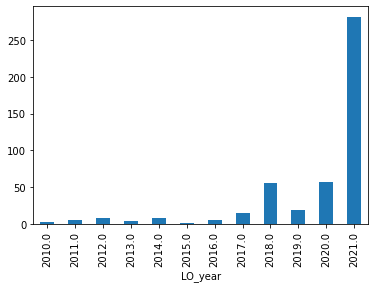

In [70]:
result.groupby(axis=0,by=['LO_year'])['LO_year'].count().plot(kind="bar")

Seleziona i portafogli attivi ossia con almeno 10 vendite ma non piu di 10'000'000

In [11]:
result_activ = result[(result['Number of Outs'] > 10) & (result['Number of Outs'] < 10000000)  ]  

In [12]:
result_activ.shape

(252, 10)

In [ ]:
result_activ

In [16]:
# Drop rows with missing data in critical columns
#result = result.dropna(subset=['Number of Outs'])

In [17]:
#result.shape

Estrapolare percentuali per calcolo somma

In [18]:
result_activ_perc= [x.split('%')[0] for x in result_activ['% of coins']]


In [ ]:
result_activ_perc

In [20]:
result_activ_perc=pd.to_numeric(result_activ_perc)

In [21]:
df_perc = pd.DataFrame(result_activ_perc)

In [ ]:
df_perc

In [23]:
df_perc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       252 non-null    float64
dtypes: float64(1)
memory usage: 2.1 KB


In [24]:
df_perc.sum(axis = 0, skipna = True) 

0    10.684745
dtype: float64

i primi 252 portafogli attivi detengono il 10.68% del capitale di bitcoin

In [25]:
result_activ = result_activ[result_activ['First Out'].notna()]

In [27]:
result_activ.shape

(252, 10)

In [42]:
result_activ = result_activ[result_activ['First In'] > '2019-01-01']

In [43]:
result_activ.shape

(40, 10)

In [32]:
result_activ.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250 entries, 0 to 1728
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   0               250 non-null    int64  
 1   Address         250 non-null    object 
 2   Balance         250 non-null    object 
 3   % of coins      250 non-null    object 
 4   First In        250 non-null    object 
 5   Last In         250 non-null    object 
 6   Number Of Ins   250 non-null    int64  
 7   First Out       250 non-null    object 
 8   Last Out        250 non-null    object 
 9   Number of Outs  250 non-null    float64
dtypes: float64(1), int64(2), object(7)
memory usage: 21.5+ KB


In [33]:
result_activ["Last Out"] = pd.to_datetime(result_activ["Last Out"])

In [34]:
result_activ.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250 entries, 0 to 1728
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   0               250 non-null    int64              
 1   Address         250 non-null    object             
 2   Balance         250 non-null    object             
 3   % of coins      250 non-null    object             
 4   First In        250 non-null    object             
 5   Last In         250 non-null    object             
 6   Number Of Ins   250 non-null    int64              
 7   First Out       250 non-null    object             
 8   Last Out        250 non-null    datetime64[ns, UTC]
 9   Number of Outs  250 non-null    float64            
dtypes: datetime64[ns, UTC](1), float64(1), int64(2), object(6)
memory usage: 21.5+ KB


In [37]:
result2019 = result_activ[(result_activ['Last Out'] > '2017-01-01')]
#result = result[[result['Last In'] < '2019-01-01']] 

In [39]:
result2019.shape

(243, 10)

In [38]:
result2019.head()

,0,Address,Balance,% of coins,First In,Last In,Number Of Ins,First Out,Last Out,Number of Outs
0,1,34xp4vRoCGJym3xR7yCVPFHoCNxv4Twseowallet: Binance-coldwallet,"288,126 BTC ($13,311,388,913) / +0.00169 BTC",1.53%,2018-10-18 12:59:18 UTC,2021-09-02 12:55:00 UTC,621,2018-10-18 13:19:26 UTC,2021-07-26 14:25:53+00:00,424.0
1,2,bc1qgdjqv0av3q56jvd82tkdjpy7gdp9ut8tlqmgrpmv24sq90ecnvqqjw..vw97wallet: Bitfinex-coldwallet,"178,011 BTC ($8,224,081,801)",0.9464%,2019-08-16 10:00:29 UTC,2021-08-26 06:57:48 UTC,70,2020-02-02 17:43:14 UTC,2021-06-25 17:58:00+00:00,66.0
2,3,1P5ZEDWTKTFGxQjZphgWPQUpe554WKDfHQ,"108,924 BTC ($5,032,254,408) -1010 BTC / -1918 BTC",0.5791%,2019-02-06 02:18:39 UTC,2021-09-08 00:05:21 UTC,438,2019-02-10 21:58:57 UTC,2021-09-02 23:34:15+00:00,54.0
4,5,38UmuUqPCrFmQo4khkomQwZ4VbY2nZMJ67 2-of-6wallet: OKEX-coldwallet,"93,566 BTC ($4,322,736,675) / +8502 BTC",0.4974%,2016-03-14 22:20:01 UTC,2021-08-26 07:19:46 UTC,262,2016-03-15 17:57:11 UTC,2021-06-11 19:41:54+00:00,131.0
5,6,3Kzh9qAqVWQhEsfQz7zEQL1EuSx5tyNLNS 2-of-3wallet: OKEX-coldwallet,"81,512 BTC ($3,765,841,999) -695 BTC / +4252 BTC",0.4333%,2015-08-25 00:28:20 UTC,2021-09-08 03:08:23 UTC,1167,2015-08-25 20:44:05 UTC,2021-09-08 03:08:23+00:00,1007.0


In [ ]:
result2019 = result2019[['Address']] 

In [ ]:
result2019['Address'] = result2019['Address'].astype(str)

In [ ]:
result2019['Address_new'] = [x.split('wallet')[0] for x in result2019['Address']]

In [ ]:
result2019['Address_new'] = [x.split(' ')[0] for x in result2019['Address_new']]

In [ ]:
result2019=result2019.drop('Address',1)

In [ ]:
result2019

In [ ]:
result2019.to_csv('list address.csv',index=False, header=True)

In [ ]:
result2019=pd.read_csv('list address.csv')

In [ ]:
result2019.shape